In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn import linear_model
from sklearn.model_selection import train_test_split

import requests

In [3]:
df = pd.read_csv('Most Popular Programming Languages from 2004 to 2021 V4.csv')
df.head(10)

,Date,Abap,Ada,C/C++,C#,Cobol,Dart,Delphi,Go,Groovy,...,PHP,Python,R,Ruby,Rust,Scala,Swift,TypeScript,VBA,Visual Basic
0,July 2004,0.34,0.36,10.08,4.71,0.43,0.0,2.82,0.0,0.03,...,18.75,2.53,0.39,0.33,0.08,0.03,0.0,0.0,1.44,8.56
1,August 2004,0.36,0.36,9.81,4.99,0.46,0.0,2.67,0.0,0.07,...,19.26,2.64,0.41,0.40,0.09,0.03,0.0,0.0,1.46,8.57
2,September 2004,0.41,0.41,9.63,5.06,0.51,0.0,2.65,0.0,0.08,...,19.49,2.72,0.40,0.41,0.10,0.03,0.0,0.0,1.55,8.41
3,October 2004,0.40,0.38,9.50,5.31,0.53,0.0,2.77,0.0,0.09,...,19.34,2.92,0.42,0.46,0.11,0.04,0.0,0.0,1.61,8.49
4,November 2004,0.38,0.38,9.52,5.24,0.55,0.0,2.76,0.0,0.07,...,19.43,2.84,0.41,0.45,0.13,0.04,0.0,0.0,1.50,8.24
5,December 2004,0.36,0.37,9.56,5.23,0.53,0.0,2.77,0.0,0.09,...,19.73,2.71,0.40,0.42,0.13,0.04,0.0,0.0,1.46,8.08
6,January 2005,0.39,0.38,9.70,5.23,0.56,0.0,2.65,0.0,0.11,...,19.81,2.91,0.39,0.47,0.15,0.03,0.0,0.0,1.51,7.79
7,February 2005,0.37,0.39,9.88,5.21,0.49,0.0,2.66,0.0,0.07,...,19.63,2.87,0.38,0.45,0.15,0.03,0.0,0.0,1.45,7.67
8,March 2005,0.34,0.37,9.88,5.38,0.45,0.0,2.65,0.0,0.08,...,19.54,2.81,0.42,0.46,0.13,0.03,0.0,0.0,1.44,7.68
9,April 2005,0.34,0.36,9.85,5.42,0.41,0.0,2.56,0.0,0.08,...,19.93,2.78,0.40,0.43,0.11,0.02,0.0,0.0,1.36,7.52


In [9]:
def createDataFrameFor(df, colunas, colunaAtual):
    return pd.DataFrame(
        {
            'Date': df.Date,
            'Timestamp': map(lambda i : datetime.strptime(df["Date"][i], '%B %Y'), range(len(df.Date))),
            'Language': colunas[colunaAtual],
            'Value': df[df.columns[colunaAtual]]
        }
    )

colunas = df.columns

dados_tratados = createDataFrameFor(df, colunas, 1)

for coluna in range(1, len(colunas)):
    dados_tratados = pd.concat([dados_tratados, createDataFrameFor(df, colunas, coluna)])

dados_tratados.reset_index(drop=True, inplace=True)

dados_tratados['UnixTime'] = list(map(lambda i: (pd.to_datetime([dados_tratados['Timestamp'][i]]).astype(int) / 10**9)[0], range(len(dados_tratados['Date']))))

dados_tratados = dados_tratados[(dados_tratados != 0).all(1)]

dados_tratados.head()

,Date,Timestamp,Language,Value,UnixTime
0,July 2004,2004-07-01,Abap,0.34,1.088640e+09
1,August 2004,2004-08-01,Abap,0.36,1.091318e+09
2,September 2004,2004-09-01,Abap,0.41,1.093997e+09
3,October 2004,2004-10-01,Abap,0.40,1.096589e+09
4,November 2004,2004-11-01,Abap,0.38,1.099267e+09


In [12]:
dados_tratados.shape

(5312, 5)

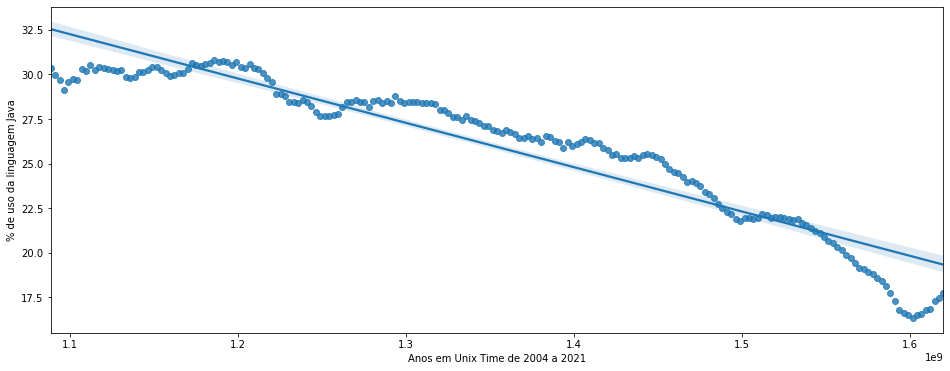

In [10]:
df_java = dados_tratados[dados_tratados['Language'] == 'Java']
sns.regplot(x="UnixTime", y="Value", data= df_java)
plt.gcf().set_size_inches(16, 6)
plt.ylabel('% de uso da linguagem Java')
plt.xlabel('Anos em Unix Time de 2004 a 2021')
plt.show()

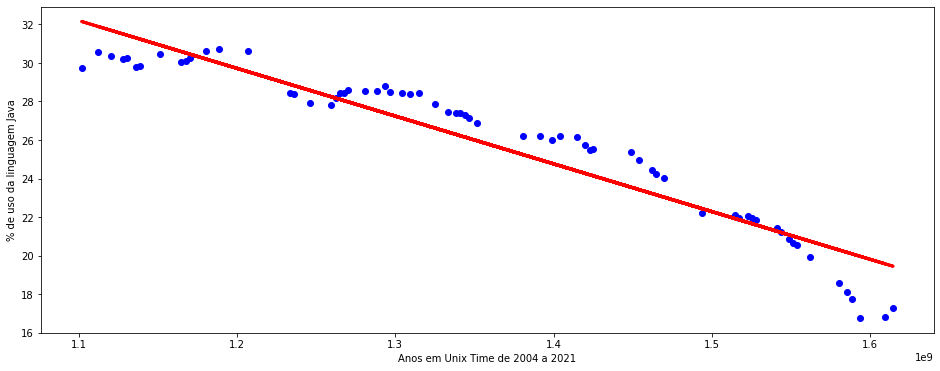

In [17]:
X = df_java.UnixTime.values.reshape(-1, 1)
y = df_java.Value.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=3)

plt.gcf().set_size_inches(16, 6)

plt.ylabel('% de uso da linguagem Java')
plt.xlabel('Anos em Unix Time de 2004 a 2021')

plt.show()

## Visualizando meus repositórios diretamente via API do Github

In [16]:
response = []
page = 0
nextPage = True

In [17]:
def build_url(actualPage):
    return 'https://api.github.com/users/vhnegrisoli/repos?page={}'.format(actualPage)

In [18]:
try:

    while (nextPage):
        
        url = build_url(page)
        print('Chamando a URL: {} para a página: {}\n'.format(url, str(page)))
        
        githubResponse = list(requests.get(url).json())
        
        if (len(githubResponse) == 0 or 'message' in str(githubResponse[0])):
        
            if (len(githubResponse)):
                print('Não há repositórios na página {}\n'.format(str(page)))
                
            if (len(githubResponse) > 0 and 'message' in str(githubResponse[0])):
                print('Limite de requisições atingido à API do Github\n')
                
            nextPage = False
        
        else:
            print('Quantidade de repositórios encontrados: {}\n'.format(str(len(githubResponse))))
            response.extend(githubResponse)
            page = page + 1

except:
    print('Erro ao consultar API do Github')
    nextPage = False
    raise

print('Total de repositórios encontrados: {}'.format(str(len(response))))

Chamando a URL: https://api.github.com/users/vhnegrisoli/repos?page=0 para a página: 0

Quantidade de repositórios encontrados: 30

Chamando a URL: https://api.github.com/users/vhnegrisoli/repos?page=1 para a página: 1

Quantidade de repositórios encontrados: 30

Chamando a URL: https://api.github.com/users/vhnegrisoli/repos?page=2 para a página: 2

Quantidade de repositórios encontrados: 30

Chamando a URL: https://api.github.com/users/vhnegrisoli/repos?page=3 para a página: 3

Quantidade de repositórios encontrados: 7

Chamando a URL: https://api.github.com/users/vhnegrisoli/repos?page=4 para a página: 4

Total de repositórios encontrados: 97


In [3]:
df = pd.DataFrame(response)

repositorios = df[['name', 'language']]

repositorios.head(10)

,name,language
0,analisador-arquivos,Java
1,analise-exploratoria-dados-python,Jupyter Notebook
2,api-crud-usuarios-nestjs,TypeScript
3,api-nodejs-express-mongodb,JavaScript
4,aplicacao_java_web_servlet_jsp,Java
5,aplicacao_spring-boot_thymeleaf,HTML
6,apresentacao-autenticacao-microsservicos,Java
7,atividade_rest-spring,Java
8,b2vn-auth-api,Java
9,b2vn-front,JavaScript


In [4]:
repositorios_agrupados = repositorios.groupby(['language']).count()

repositorios_agrupados.head(15)

,name
language,
CSS,1
HTML,9
Handlebars,1
Java,40
JavaScript,23
Jupyter Notebook,12
Python,3
SQLPL,1
TSQL,1


In [9]:
def ajustar_tamanho():
    plt.gcf().set_size_inches(20, 9)    

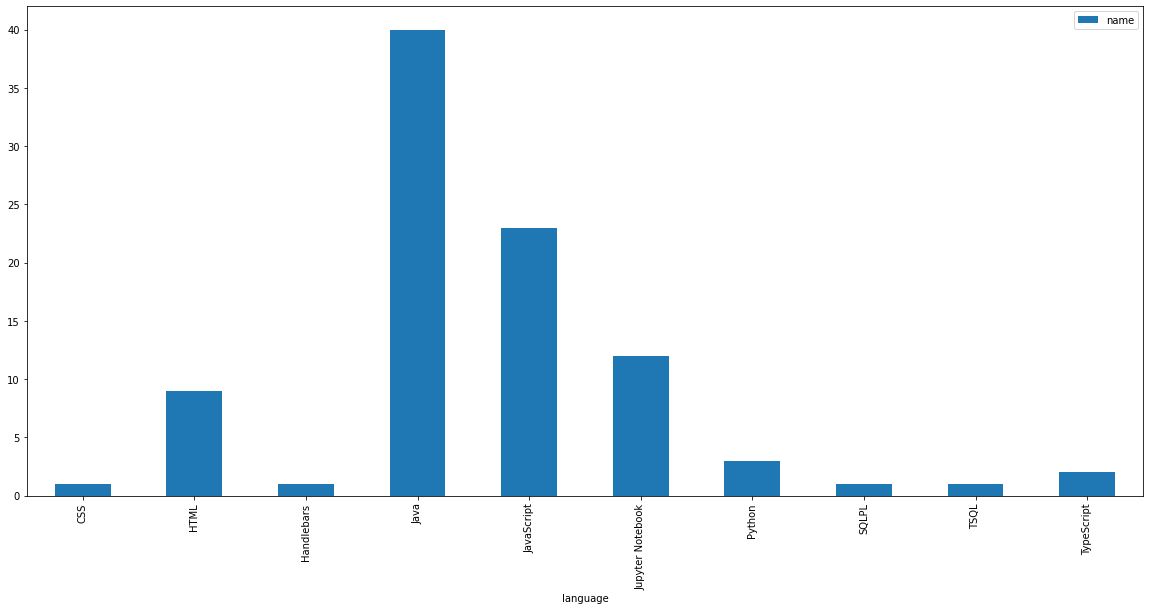

In [11]:
repositorios_agrupados.plot(kind = 'bar')

ajustar_tamanho()

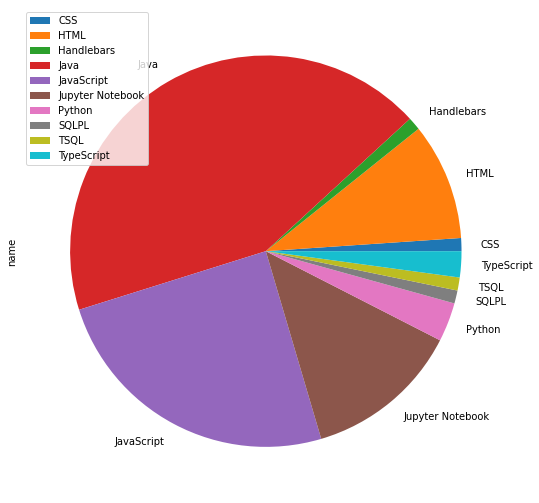

In [12]:
repositorios_agrupados.plot(kind = 'pie', subplots = True)

ajustar_tamanho()